<a href="https://colab.research.google.com/github/kanakesh2006/Langgraph_for_Agentic_AI_Concepts/blob/main/Conditional%20Workflows/quadratic_equation_conditional_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conditional Workflows/

In [2]:
!pip install langchain langgraph langchain_google_genai langchain_groq langchain_community transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.1/719.1 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
 

In [1]:
from langgraph.graph import StateGraph, START, END
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain_groq import ChatGroq
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field


In [2]:
# define state

class QuadState(TypedDict):

  a: int
  b: int
  c: int

  equation: str
  discriminant: float
  result: str


In [3]:
# node functions

def show_equation(state: QuadState):

  equation = f'{state['a']}x^2 {state['b']}x {state['c']}'

  return {'equation':equation}


def calculate_discriminant(state: QuadState):

  discriminant = state['b']**2 - (4*state['a']*state['c'])

  return {'discriminant': discriminant}


def real_roots(state: QuadState):

  root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
  root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

  result = f'The roots are {root1} and {root2}'

  return {'result': result}


def repeated_roots(state: QuadState):

  root = (-state["b"])/(2*state["a"])

  result = f'Only repeating root is {root}'

  return {'result': result}


def no_real_roots(state: QuadState):

  result = f'No real roots'

  return {'result': result}


def check_condition(state: QuadState) -> Literal["Real Roots", "Repeated Roots", "No Real Roots"]:

  if state['discriminant'] > 0:
    return "Real Roots"
  elif state['discriminant'] == 0:
    return "Repeated Roots"
  else:
    return "No Real Roots"

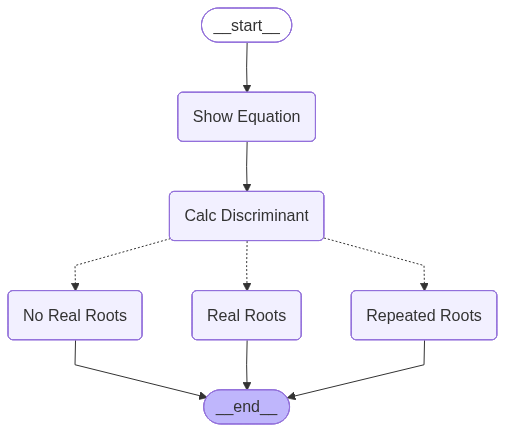

In [4]:
# define graph
graph = StateGraph(QuadState)

# add nodes
graph.add_node('Show Equation', show_equation)
graph.add_node('Calc  Discriminant',calculate_discriminant)
graph.add_node('Real Roots', real_roots)
graph.add_node('Repeated Roots', repeated_roots)
graph.add_node('No Real Roots', no_real_roots)

# add edges
graph.add_edge(START, "Show Equation")
graph.add_edge("Show Equation", "Calc  Discriminant")
graph.add_conditional_edges("Calc  Discriminant", check_condition)
graph.add_edge("Real Roots", END)
graph.add_edge("Repeated Roots", END)
graph.add_edge("No Real Roots", END)

# compile the graph
graph.compile()


In [5]:
workflow = graph.compile()

In [6]:
initial_state = {
    'a': 4,
    'b': -5,
    'c': -4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x^2 -5x -4',
 'discriminant': 89,
 'result': 'The roots are 1.8042476415070754 and -0.5542476415070754'}